<a href="https://colab.research.google.com/github/nourshadid/ML-Models/blob/main/IEEE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv(r"train_V2.csv")
test = pd.read_csv(r"test_V2.csv")
sample = pd.read_csv(r"sample_submission_V2.csv")

In [ ]:
train.shape

(1406892, 29)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406892 entries, 0 to 1406891
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1406892 non-null  object 
 1   groupId          1406892 non-null  object 
 2   matchId          1406892 non-null  object 
 3   assists          1406891 non-null  float64
 4   boosts           1406891 non-null  float64
 5   damageDealt      1406891 non-null  float64
 6   DBNOs            1406891 non-null  float64
 7   headshotKills    1406891 non-null  float64
 8   heals            1406891 non-null  float64
 9   killPlace        1406891 non-null  float64
 10  killPoints       1406891 non-null  float64
 11  kills            1406891 non-null  float64
 12  killStreaks      1406891 non-null  float64
 13  longestKill      1406891 non-null  float64
 14  matchDuration    1406891 non-null  float64
 15  matchType        1406891 non-null  object 
 16  maxPlace         1

In [ ]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [ ]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.sample(15)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
669044,ed10e99b272b89,7d2b3fb337dbe9,699cbc4125f5f7,0.0,0.0,0.00,0.0,0.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,183.10,2.0,0.0,0.2857
748483,c5b9cb0ba3a57d,404a5bebf5090f,66085b94baf233,0.0,1.0,20.99,0.0,0.0,7.0,47.0,...,0.0,315.1,0.0,0.0,0.0,0.0,3093.00,9.0,0.0,0.7111
1035612,3c5150b7f8897a,c0c5931cb347f9,b584c6d7858cff,0.0,1.0,158.50,1.0,0.0,2.0,31.0,...,1.0,2626.0,0.0,0.0,0.0,0.0,1202.00,5.0,1532.0,0.5208
633952,fab82998738edf,fa220f06757109,907142d79393e7,0.0,0.0,0.00,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.62,1.0,0.0,0.0638
1276932,45b6c323c7a373,dab634923b12c9,35800e47c5824f,0.0,0.0,0.00,0.0,0.0,0.0,62.0,...,0.0,3158.0,0.0,0.0,0.0,0.0,623.80,6.0,0.0,0.4792
711432,dec2c562dc39b3,2e4bc2abc477bf,02f656fa780115,0.0,1.0,200.00,1.0,1.0,1.0,13.0,...,1.0,9111.0,0.0,0.0,0.0,0.0,1219.00,5.0,0.0,0.2000
467927,8b7fc55ffbe21c,a8d76a92bb7a5e,88b3743eb14231,0.0,0.0,0.00,0.0,0.0,0.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,304.30,1.0,1500.0,0.1809
758889,93786955dcf022,11dce13548e646,772ed3f8bdafe6,0.0,0.0,54.08,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,226.10,4.0,1438.0,0.1250
1231568,2a2af8cba27942,b24a4f1f826c7a,7de1e788b5f739,0.0,4.0,361.40,1.0,1.0,3.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2168.00,14.0,0.0,0.9130
216216,8e8dabeb46f976,d0697002d7ace1,383714611897f7,0.0,0.0,77.22,1.0,0.0,0.0,93.0,...,1.0,0.0,0.0,0.0,0.0,0.0,32.82,1.0,0.0,0.1000


In [ ]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,...,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06,1.406891e+06
mean,2.337964e-01,1.107497e+00,1.308573e+02,6.581050e-01,2.271228e-01,1.370683e+00,4.759661e+01,5.060293e+02,9.255344e-01,5.443528e-01,...,1.645358e-01,6.065825e+02,3.473617e-03,4.519341e+00,2.383767e-02,7.896845e-03,1.155072e+03,3.661107e+00,6.077870e+02,4.728239e-01
std,5.889026e-01,1.716458e+00,1.712242e+02,1.145502e+00,6.004077e-01,2.679795e+00,2.747470e+01,6.276637e+02,1.560929e+00,7.113722e-01,...,4.705264e-01,1.498433e+03,7.326585e-02,3.066244e+01,1.680751e-01,9.243298e-02,1.184769e+03,2.454064e+00,7.399778e+02,3.075475e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.436000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.860000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.861000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,4.451500e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.977000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.100000e+01,3.300000e+01,6.616000e+03,3.800000e+01,4.000000e+01,6.300000e+01,1.000000e+02,2.170000e+03,6.600000e+01,1.400000e+01,...,1.900000e+01,3.540000e+04,9.000000e+00,3.823000e+03,1.200000e+01,4.000000e+00,2.578000e+04,1.280000e+02,2.001000e+03,1.000000e+00


In [ ]:
train.drop(columns=['groupId', 'matchId', 'matchDuration', 'numGroups'], inplace=True)

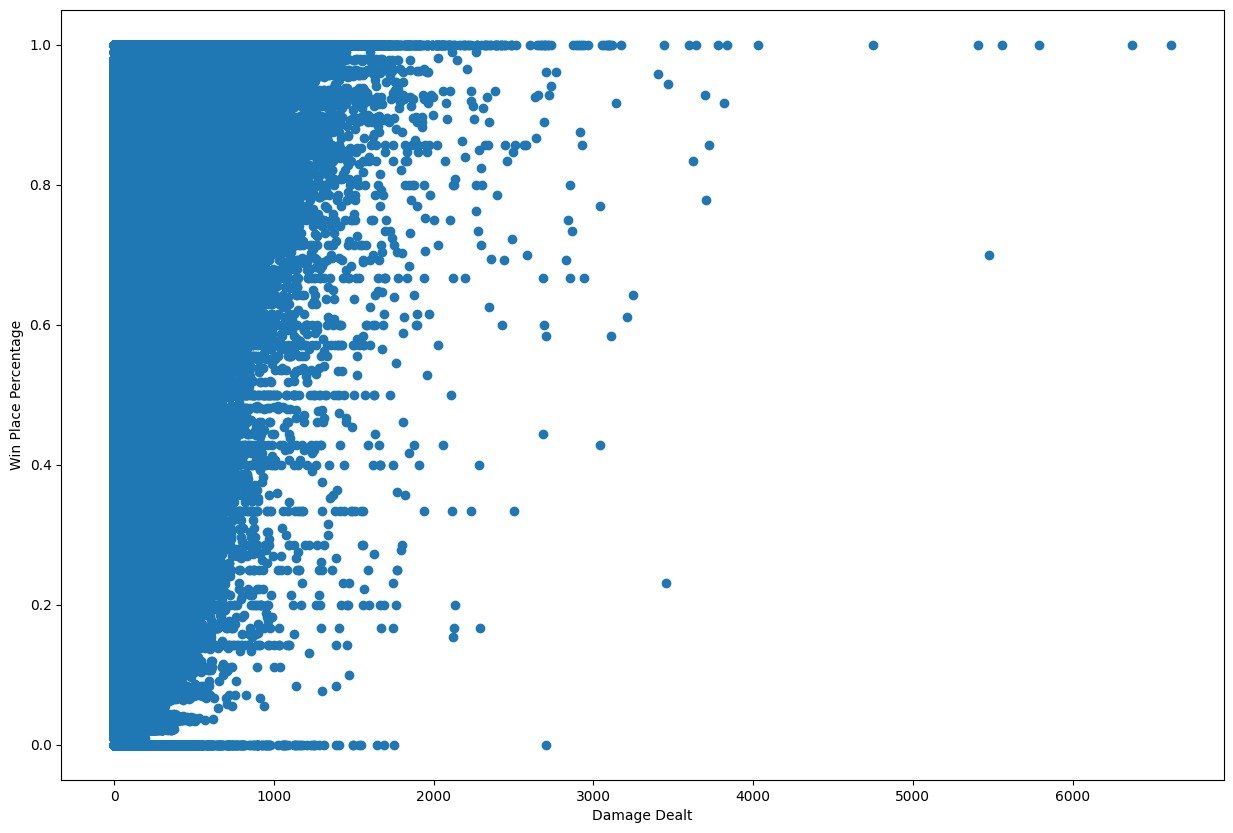

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(train['damageDealt'], train['winPlacePerc'])
ax.set_xlabel('Damage Dealt')
ax.set_ylabel('Win Place Percentage')

plt.show()

In [ ]:
train.shape

(1406891, 25)

<ipython-input-59-01363a1b6e2a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307350,0.406936,0.299434,0.198457,0.227348,-0.289195,0.037935,0.319462,0.242259,...,0.199283,0.110385,0.011984,0.021929,0.006263,0.057526,0.289894,0.245457,0.022804,0.299204
boosts,0.307350,1.000000,0.520871,0.360499,0.335464,0.535437,-0.555366,0.008221,0.501160,0.405659,...,0.254219,0.328265,0.034724,0.106809,0.013161,0.088327,0.640462,0.406892,-0.007863,0.634609
damageDealt,0.406936,0.520871,1.000000,0.735780,0.614241,0.342060,-0.676720,0.049336,0.889370,0.702754,...,0.257261,0.140732,0.052220,0.035542,0.016379,0.081153,0.397662,0.355237,0.017063,0.440192
DBNOs,0.299434,0.360499,0.735780,1.000000,0.471096,0.265517,-0.556066,0.042551,0.707871,0.647263,...,0.298856,0.103136,0.037212,0.016294,0.070226,0.060689,0.285377,0.219098,0.010671,0.280435
headshotKills,0.198457,0.335464,0.614241,0.471096,1.000000,0.200731,-0.471592,0.024905,0.674273,0.513259,...,0.152028,0.076367,0.012911,0.028182,0.008417,0.038431,0.251588,0.219048,0.005811,0.278890
heals,0.227348,0.535437,0.342060,0.265517,0.200731,1.000000,-0.386192,-0.002627,0.310815,0.270408,...,0.236203,0.296535,0.023363,0.080647,0.034679,0.064816,0.430993,0.308976,-0.011030,0.427796
killPlace,-0.289195,-0.555366,-0.676720,-0.556066,-0.471592,-0.386192,1.000000,-0.023720,-0.729834,-0.810636,...,-0.270365,-0.236378,-0.057193,-0.088461,-0.037794,-0.073610,-0.590403,-0.491338,-0.002768,-0.719334
killPoints,0.037935,0.008221,0.049336,0.042551,0.024905,-0.002627,-0.023720,1.000000,0.035457,0.036649,...,0.012640,-0.029113,-0.003905,-0.003877,-0.038418,-0.009931,0.005399,-0.004453,0.983371,0.013464
kills,0.319462,0.501160,0.889370,0.707871,0.674273,0.310815,-0.729834,0.035457,1.000000,0.801644,...,0.252871,0.113966,0.062866,0.038075,0.018251,0.079592,0.374195,0.338100,0.006106,0.419635
killStreaks,0.242259,0.405659,0.702754,0.647263,0.513259,0.270408,-0.810636,0.036649,0.801644,1.000000,...,0.241766,0.098416,0.064721,0.033296,0.028232,0.064029,0.327823,0.276082,0.008050,0.377591


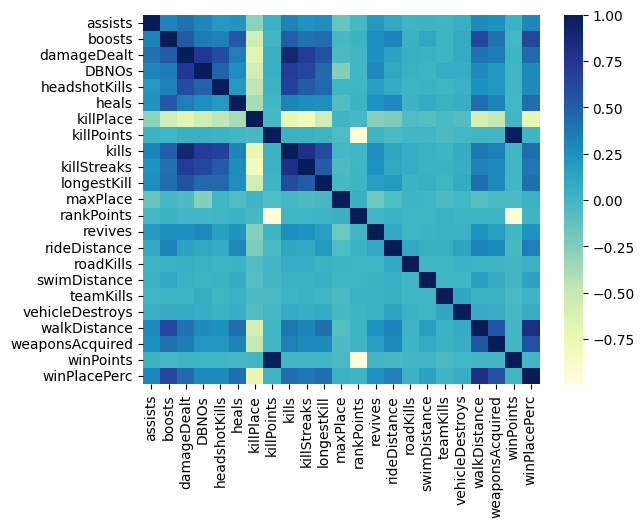

In [ ]:
import seaborn as sns
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu')
corr_matrix

**Strong Correlations**

In [ ]:
# Loop through all the columns in the dataframe
for column in corr_matrix.columns:
    # Loop through all the rows in the dataframe
    for row in corr_matrix.index:
        # Check if the correlation is greater than 0.5 and not equal to 1 (since correlations with itself will always be 1)
        if (corr_matrix.loc[row, column] > 0.5) and (corr_matrix.loc[row, column] != 1):
            # Display the column, row, and correlation value
            print(f"Correlation between {column} and {row}: {corr_matrix.loc[row, column]}")

Correlation between boosts and damageDealt: 0.5208711955576386
Correlation between boosts and heals: 0.5354374893765872
Correlation between boosts and kills: 0.5011596674647003
Correlation between boosts and walkDistance: 0.6404617065805882
Correlation between boosts and winPlacePerc: 0.6346087962819362
Correlation between damageDealt and boosts: 0.5208711955576386
Correlation between damageDealt and DBNOs: 0.7357803278860863
Correlation between damageDealt and headshotKills: 0.6142405792097207
Correlation between damageDealt and kills: 0.8893704751289135
Correlation between damageDealt and killStreaks: 0.7027540144026696
Correlation between damageDealt and longestKill: 0.5639404282209387
Correlation between DBNOs and damageDealt: 0.7357803278860863
Correlation between DBNOs and kills: 0.7078713848086
Correlation between DBNOs and killStreaks: 0.6472626717321922
Correlation between headshotKills and damageDealt: 0.6142405792097207
Correlation between headshotKills and kills: 0.67427337

Extracting feature number 1 : by extracting the total distance and finding the kills that have been shot without the player moving

In [ ]:
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

Extracting feature number 2 : total number of kills

In [ ]:
train['totalKills'] = train['kills'] + train['headshotKills']

Extracting feature number 3 : total distance per kills


In [ ]:
train['distancePerKill'] = train['totalDistance'] / train['totalKills']

Extracting feature number 4 : down but not out per total kills

In [ ]:
train['DBNOsPerKill'] = train['DBNOs'] / train['totalKills']

Extracting feature number 5 : 'totalItemsAcquired' = weapons + boost(energy drinks, piankillers, etc)

In [ ]:
train['totalItemsAcquired'] = train['weaponsAcquired'] + train['boosts']

Identifying hackers: earlier I extracted a new feature that's called 'killWithoutMoving' that the players that killed without moving could possibly be a hackers
Extracting players that have kills greater than or equal to 20

In [ ]:
train['killWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train['extraKills'] = train['totalKills'] >= 20

In [ ]:
print(train[train['killWithoutMoving'] == True].shape)
print(train[train['extraKills'] == True].shape)

(527, 32)
(629, 32)


In [ ]:
train['CHEATERS'] = (train['killWithoutMoving'].any() or train['extraKills'].any())
print(train[train['CHEATERS'] == True].shape)

(1406891, 33)


Exracting number of outliers in each column

In [ ]:
for column in train.columns:
    if train[column].dtype == 'object':
        continue  # skip string columns
    if train[column].dtype == 'bool':
        train[column] = train[column].astype(int)  # convert boolean to integer
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)


    iqr = q3 - q1
    outlier_min = q1 - 1.5 * iqr
    outlier_max = q3 + 1.5 * iqr

    outliers = train[(train[column] < outlier_min) | (train[column] > outlier_max)]
    print(f"{column}: {len(outliers)} outliers")


assists: 246574 outliers
boosts: 45030 outliers
damageDealt: 68137 outliers
DBNOs: 93469 outliers
headshotKills: 237996 outliers
heals: 103409 outliers
killPlace: 0 outliers
killPoints: 0 outliers
kills: 163765 outliers
killStreaks: 16668 outliers
longestKill: 194208 outliers
maxPlace: 222496 outliers
rankPoints: 21 outliers
revives: 185632 outliers
rideDistance: 351293 outliers
roadKills: 4056 outliers
swimDistance: 91836 outliers
teamKills: 30544 outliers
vehicleDestroys: 10654 outliers
walkDistance: 8593 outliers
weaponsAcquired: 25053 outliers
winPoints: 0 outliers
winPlacePerc: 0 outliers
totalDistance: 65548 outliers
killWithoutMoving: 527 outliers
totalKills: 56714 outliers
distancePerKill: 0 outliers
DBNOsPerKill: 99394 outliers


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


totalItemsAcquired: 16163 outliers
extraKills: 629 outliers
CHEATERS: 0 outliers


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406891 entries, 0 to 1406890
Data columns (total 33 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1406891 non-null  object 
 1   assists             1406891 non-null  float64
 2   boosts              1406891 non-null  float64
 3   damageDealt         1406891 non-null  float64
 4   DBNOs               1406891 non-null  float64
 5   headshotKills       1406891 non-null  float64
 6   heals               1406891 non-null  float64
 7   killPlace           1406891 non-null  float64
 8   killPoints          1406891 non-null  float64
 9   kills               1406891 non-null  float64
 10  killStreaks         1406891 non-null  float64
 11  longestKill         1406891 non-null  float64
 12  matchType           1406891 non-null  object 
 13  maxPlace            1406891 non-null  float64
 14  rankPoints          1406891 non-null  float64
 15  revives        

In [ ]:
train = pd.get_dummies(train, columns=['matchType'], drop_first=True)
train.shape

(1406891, 47)

In [ ]:
train.dropna(inplace=True)
train.shape

(702052, 47)

In [ ]:
is_inf = train.applymap(lambda x: np.isinf(x) if isinstance(x, (int, float)) else False)
train = train[~is_inf]
train.shape

(702052, 47)

In [ ]:
train.dropna(inplace=True)
train.shape

(606726, 47)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

Train = train.drop(['Id'], axis=1)

features = Train.drop(['winPlacePerc'], axis=1)
target = Train['winPlacePerc']

In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model = SGDRegressor(max_iter=5000)
model.fit(X_train, y_train)

SGDRegressor(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

score = model.score(X_test, y_test)
print(f"R-squared score: {score:.2f}")

MAE: 692912794461852.2
R-squared score: -9961720637089557593115089436672.00


In [ ]:
submission = pd.DataFrame({'winPlacePerc': predictions})
submission.to_csv('submission.csv', index=False)